#20newsgroups
The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/20newsgroup.png" width="1200">

In [2]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.datasets import fetch_20newsgroups

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

newsgroups_train = fetch_20newsgroups(subset='train',shuffle=True)
y_train = newsgroups_train.target

vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(newsgroups_train.data)
print(X_train.shape)

newsgroups_test = fetch_20newsgroups(subset='test',shuffle=True)
X_test = vectorizer.transform(newsgroups_test.data)
y_test = newsgroups_test.target
print(X_test.shape)

(11314, 129796)
(7532, 129796)


In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

classifier = MultinomialNB(alpha=.01)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       319
           1       0.68      0.74      0.71       389
           2       0.72      0.63      0.67       394
           3       0.64      0.73      0.69       392
           4       0.83      0.83      0.83       385
           5       0.84      0.77      0.81       395
           6       0.79      0.78      0.79       390
           7       0.89      0.90      0.90       396
           8       0.93      0.96      0.94       398
           9       0.95      0.94      0.95       397
          10       0.95      0.97      0.96       399
          11       0.90      0.93      0.91       396
          12       0.79      0.77      0.78       393
          13       0.89      0.83      0.86       396
          14       0.88      0.91      0.89       394
          15       0.84      0.95      0.89       398
          16       0.77      0.91      0.83       364
          17       0.97    

Text(141.0, 0.5, 'Actual')

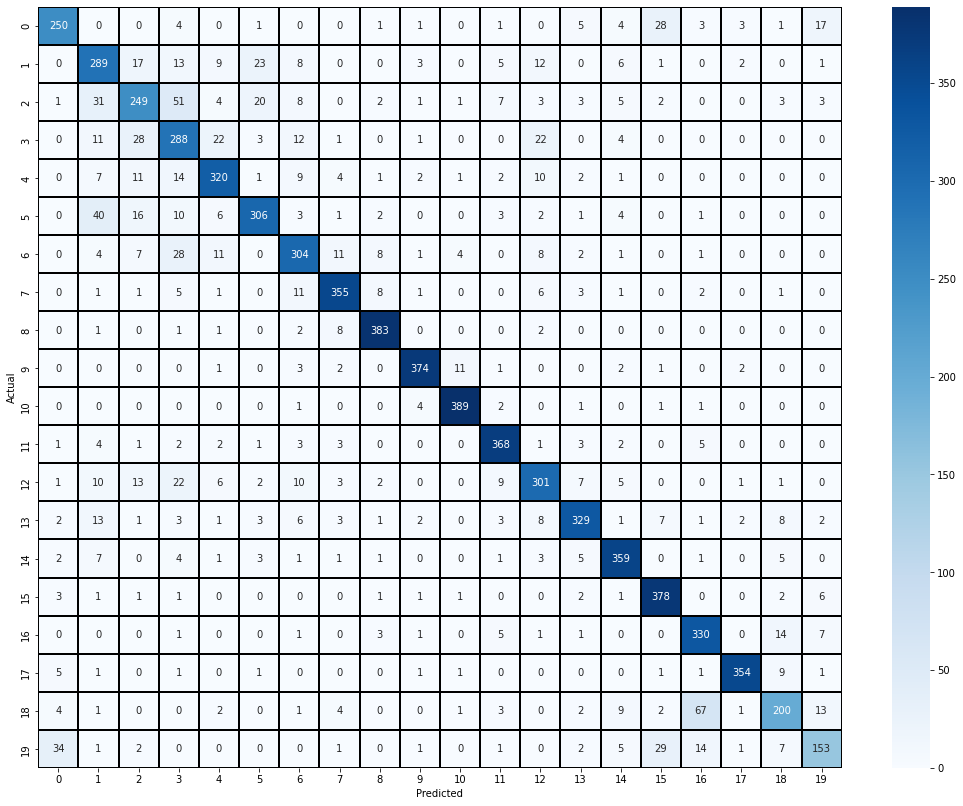

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (18,14))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='')

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [6]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50,max_depth=5)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.83      0.27      0.40       319
           1       0.60      0.37      0.45       389
           2       0.51      0.66      0.58       394
           3       0.35      0.39      0.37       392
           4       0.68      0.16      0.26       385
           5       0.61      0.45      0.52       395
           6       0.21      0.59      0.32       390
           7       0.57      0.46      0.51       396
           8       0.52      0.77      0.62       398
           9       0.65      0.45      0.53       397
          10       0.55      0.91      0.68       399
          11       0.55      0.80      0.65       396
          12       0.30      0.30      0.30       393
          13       0.56      0.27      0.36       396
          14       0.66      0.55      0.60       394
          15       0.43      0.83      0.56       398
          16       0.70      0.51      0.59       364
          17       0.72    

Text(141.0, 0.5, 'Actual')

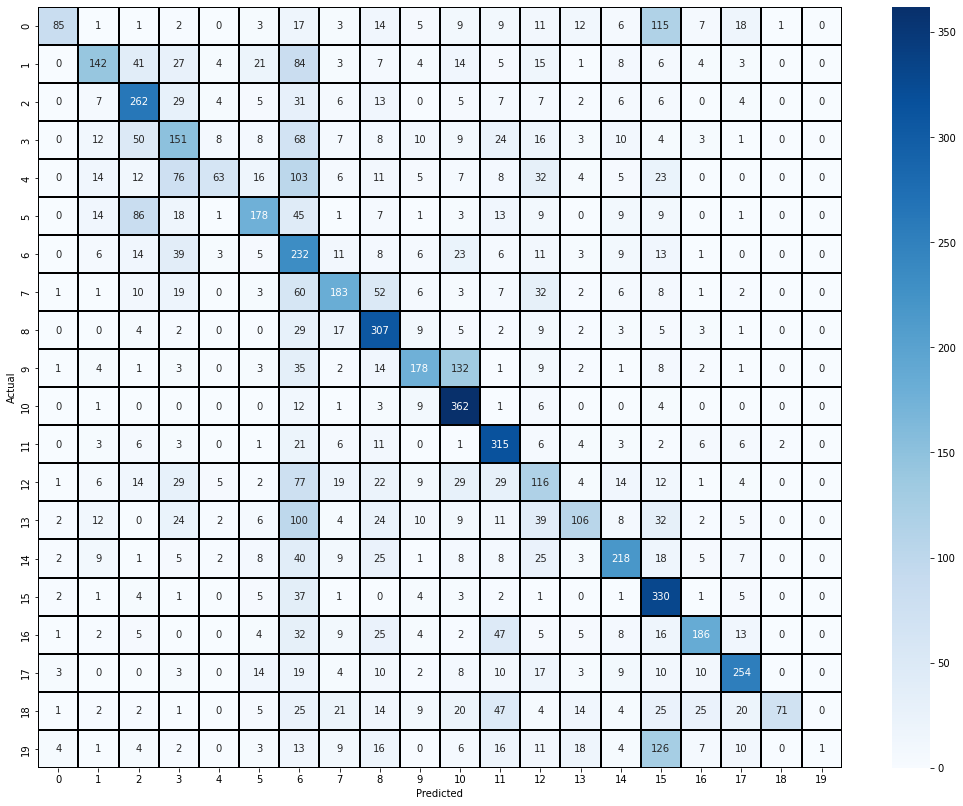

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (18,14))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='')

plt.xlabel("Predicted")
plt.ylabel("Actual")

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

bow = CountVectorizer(stop_words='english')
tfidf = TfidfTransformer()
classifier = MultinomialNB(alpha=.01)

pipe = Pipeline([('bow', bow),
                 ('tfidf', tfidf),
                 ('clf', classifier),
                ])

pipe.fit(newsgroups_train.data,newsgroups_train.target)
prediction = pipe.predict(newsgroups_test.data)
f1_score(y_test, prediction, average='macro')

0.8278889894475222